#### Importing all the required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing Data and printing the data type of each column.

In [2]:
email = pd.read_csv(r"C:\Users\wel come\Emails_sent.csv")
fines = pd.read_csv(r"C:\Users\wel come\Fines_paid.csv")
#email.head()
#fines.head()
email.dtypes

name_last         object
name_first        object
name_middle       object
mail_sent_date    object
office            object
dtype: object

#### removing leading spaces in mail_sent_date column
#### cleaning the mail_sent_date coloumn(removing time values given in some entries along with date)

In [3]:
email['mail_sent_date'] = email['mail_sent_date'].str.lstrip()
email['mail_sent_date'] = email['mail_sent_date'].str.split(' ').str[0]
email.head()

,name_last,name_first,name_middle,mail_sent_date,office
0,ADELGLASS,JEFFREY,M.,2009-05-22,Center for Drug Evaluation and Research
1,ADKINSON,N.,FRANKLIN,2010-04-17,Center for Biologics Evaluation and Research
2,ALLEN,MARK,S.,2012-01-26,Center for Devices and Radiological Health
3,AMSTERDAM,DANIEL,NaN,2014.11.15,Center for Biologics Evaluation and Research
4,AMSTUTZ,HARLAN,C.,2014.07.17,Center for Devices and Radiological Health


#### Ques-(1)- Standardise the mail_sent_date column values to YYYY-MM-DD standard date format?

In [4]:

email['mail_sent_date'] = pd.to_datetime(email['mail_sent_date'], format='%Y/%m/%d')
email.head(7)

,name_last,name_first,name_middle,mail_sent_date,office
0,ADELGLASS,JEFFREY,M.,2009-05-22,Center for Drug Evaluation and Research
1,ADKINSON,N.,FRANKLIN,2010-04-17,Center for Biologics Evaluation and Research
2,ALLEN,MARK,S.,2012-01-26,Center for Devices and Radiological Health
3,AMSTERDAM,DANIEL,NaN,2014-11-15,Center for Biologics Evaluation and Research
4,AMSTUTZ,HARLAN,C.,2014-07-17,Center for Devices and Radiological Health
5,ANDERSON,C.,JOSEPH,2010-02-22,Center for Devices and Radiological Health
6,ANDREWS,DAVID,W.,2010-07-17,Center for Biologics Evaluation and Research


#### Ques(2)- Count the number of mails sent each year?

In [5]:
year = email['mail_sent_date'].dt.year
year_count = email['mail_sent_date'].dt.year.value_counts()
year_count

2014    32
2015    31
2019    25
2016    25
2010    25
2018    23
2013    21
2011    20
2012    16
2007    15
2009    14
2017    11
2008     8
2020     5
2006     1
Name: mail_sent_date, dtype: int64

#### Plot the above results

Text(0, 0.5, 'Count')

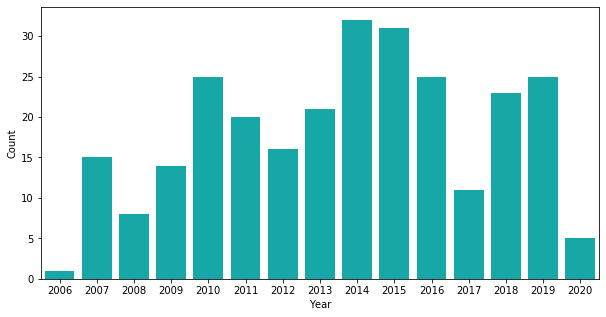

In [6]:
plt.figure(figsize=(10,5))
sns.countplot(x= year, data=email, color = 'c')
plt.xlabel('Year')
plt.ylabel('Count')

In [7]:
fines.head()

,org_indiv,first_name,last_name,city,state,category,cash_fine,online_fine
0,3-D MEDICAL SERVICES LLC,STEVEN,DEITELZWEIG,NEW ORLEANS,LA,Professional Advising,"$2,625.00",$-
1,"AA DOCTORS, INC.",AAKASH,AHUJA,PASO ROBLES,CA,Expert-Led Forums,"$1,000.00",$-
2,"ABBO, LILIAN MARGARITA",LILIAN,ABBO,MIAMI,FL,Business Related Travel,$-,$448.00
3,"ABBO, LILIAN MARGARITA",LILIAN,ABBO,MIAMI,FL,Meals,$-,$119.00
4,"ABBO, LILIAN MARGARITA",LILIAN,ABBO,MIAMI,FL,Professional Advising,"$1,800.00",$-


In [8]:
fines.dtypes

org_indiv       object
first_name      object
last_name       object
city            object
state           object
category        object
cash_fine       object
online_fine     object
dtype: object

#### Cleaning and making ready fine columns to be added
#### step-1 removing dollar sign

In [9]:
fines['online_fine '] = fines['online_fine '].str.strip()
fines['online_fine '] = fines['online_fine '].str.split('$').str[1]
fines.head()

,org_indiv,first_name,last_name,city,state,category,cash_fine,online_fine
0,3-D MEDICAL SERVICES LLC,STEVEN,DEITELZWEIG,NEW ORLEANS,LA,Professional Advising,"$2,625.00",-
1,"AA DOCTORS, INC.",AAKASH,AHUJA,PASO ROBLES,CA,Expert-Led Forums,"$1,000.00",-
2,"ABBO, LILIAN MARGARITA",LILIAN,ABBO,MIAMI,FL,Business Related Travel,$-,448.00
3,"ABBO, LILIAN MARGARITA",LILIAN,ABBO,MIAMI,FL,Meals,$-,119.00
4,"ABBO, LILIAN MARGARITA",LILIAN,ABBO,MIAMI,FL,Professional Advising,"$1,800.00",-


#### Cleaning and making ready fine columns to be added
#### step-1 removing dollar sign

In [10]:
fines['cash_fine '] = fines['cash_fine '].str.strip()
fines['cash_fine '] = fines['cash_fine '].str.split('$').str[1]
fines['cash_fine '].head()

0    2,625.00
1    1,000.00
2           -
3           -
4    1,800.00
Name: cash_fine , dtype: object

#### Cleaning and making ready fine columns to be added
#### step-2 removing - sign and replacing with 0

In [11]:
fines['online_fine '] = fines['online_fine '].replace('-',0.00)
fines['cash_fine '] = fines['cash_fine '].replace('-',0.00)
fines.head()

,org_indiv,first_name,last_name,city,state,category,cash_fine,online_fine
0,3-D MEDICAL SERVICES LLC,STEVEN,DEITELZWEIG,NEW ORLEANS,LA,Professional Advising,"2,625.00",0
1,"AA DOCTORS, INC.",AAKASH,AHUJA,PASO ROBLES,CA,Expert-Led Forums,"1,000.00",0
2,"ABBO, LILIAN MARGARITA",LILIAN,ABBO,MIAMI,FL,Business Related Travel,0,448.00
3,"ABBO, LILIAN MARGARITA",LILIAN,ABBO,MIAMI,FL,Meals,0,119.00
4,"ABBO, LILIAN MARGARITA",LILIAN,ABBO,MIAMI,FL,Professional Advising,"1,800.00",0


#### Cleaning and making ready fine columns to be added
#### step-3 removing ',' signs from numbers

In [12]:
fines['online_fine '] = fines['online_fine '].str.replace(',','')
fines['cash_fine '] = fines['cash_fine '].str.replace(',','')
fines.head()

,org_indiv,first_name,last_name,city,state,category,cash_fine,online_fine
0,3-D MEDICAL SERVICES LLC,STEVEN,DEITELZWEIG,NEW ORLEANS,LA,Professional Advising,2625.00,NaN
1,"AA DOCTORS, INC.",AAKASH,AHUJA,PASO ROBLES,CA,Expert-Led Forums,1000.00,NaN
2,"ABBO, LILIAN MARGARITA",LILIAN,ABBO,MIAMI,FL,Business Related Travel,NaN,448.00
3,"ABBO, LILIAN MARGARITA",LILIAN,ABBO,MIAMI,FL,Meals,NaN,119.00
4,"ABBO, LILIAN MARGARITA",LILIAN,ABBO,MIAMI,FL,Professional Advising,1800.00,NaN


#### Cleaning and making ready fine columns to be added
#### step-4 replacing nan values with 0

In [13]:
fines['online_fine '] = fines['online_fine '].fillna(0)
fines['cash_fine '] = fines['cash_fine '].fillna(0)
fines.head()

,org_indiv,first_name,last_name,city,state,category,cash_fine,online_fine
0,3-D MEDICAL SERVICES LLC,STEVEN,DEITELZWEIG,NEW ORLEANS,LA,Professional Advising,2625.00,0
1,"AA DOCTORS, INC.",AAKASH,AHUJA,PASO ROBLES,CA,Expert-Led Forums,1000.00,0
2,"ABBO, LILIAN MARGARITA",LILIAN,ABBO,MIAMI,FL,Business Related Travel,0,448.00
3,"ABBO, LILIAN MARGARITA",LILIAN,ABBO,MIAMI,FL,Meals,0,119.00
4,"ABBO, LILIAN MARGARITA",LILIAN,ABBO,MIAMI,FL,Professional Advising,1800.00,0


#### Cleaning and making ready fine columns to be added

In [14]:
#fines['online_fine '].apply(type).value_counts()
fines['cash_fine '].apply(type).value_counts()

<class 'int'>    5424
<class 'str'>    4663
Name: cash_fine , dtype: int64

#### Cleaning and making ready fine columns to be added
#### step-5 Converting both colomuns to numeric datatype

In [15]:
fines['online_fine '] = pd.to_numeric(fines['online_fine '])
fines['cash_fine '] = pd.to_numeric(fines['cash_fine '])
fines.head()

,org_indiv,first_name,last_name,city,state,category,cash_fine,online_fine
0,3-D MEDICAL SERVICES LLC,STEVEN,DEITELZWEIG,NEW ORLEANS,LA,Professional Advising,2625.0,0.0
1,"AA DOCTORS, INC.",AAKASH,AHUJA,PASO ROBLES,CA,Expert-Led Forums,1000.0,0.0
2,"ABBO, LILIAN MARGARITA",LILIAN,ABBO,MIAMI,FL,Business Related Travel,0.0,448.0
3,"ABBO, LILIAN MARGARITA",LILIAN,ABBO,MIAMI,FL,Meals,0.0,119.0
4,"ABBO, LILIAN MARGARITA",LILIAN,ABBO,MIAMI,FL,Professional Advising,1800.0,0.0


#### sum 'cash_fine' and 'online_fine' to create a new column named 'total_fine'

In [16]:
fines['total_fine'] = fines['online_fine '] + fines['cash_fine ']
fines.head()

,org_indiv,first_name,last_name,city,state,category,cash_fine,online_fine,total_fine
0,3-D MEDICAL SERVICES LLC,STEVEN,DEITELZWEIG,NEW ORLEANS,LA,Professional Advising,2625.0,0.0,2625.0
1,"AA DOCTORS, INC.",AAKASH,AHUJA,PASO ROBLES,CA,Expert-Led Forums,1000.0,0.0,1000.0
2,"ABBO, LILIAN MARGARITA",LILIAN,ABBO,MIAMI,FL,Business Related Travel,0.0,448.0,448.0
3,"ABBO, LILIAN MARGARITA",LILIAN,ABBO,MIAMI,FL,Meals,0.0,119.0,119.0
4,"ABBO, LILIAN MARGARITA",LILIAN,ABBO,MIAMI,FL,Professional Advising,1800.0,0.0,1800.0


#### Ques-(3) Write a query to get the highest total fine paid per state?

In [81]:
fines.groupby(['state']).total_fine.max().sort_values(ascending = False)

state
FL    1185466.0
NC     857698.0
PA     672263.0
MA     617548.0
TX     479314.0
CA     323122.0
CO     282565.0
AL     232991.0
UT     224997.0
OR     186490.0
TN     177786.0
MD     171986.0
IL     160984.0
MI     152466.0
AZ     151642.0
MN     146623.0
KY     137642.0
CT     132853.0
WI     131863.0
IA     123375.0
SC     117225.0
OH     107292.0
GA     101734.0
NY     100000.0
MO      88302.0
NJ      88087.0
NH      78000.0
AR      77670.0
KS      70000.0
RI      65278.0
DC      62000.0
NE      50449.0
WA      46660.0
LA      42000.0
IN      40500.0
VA      38102.0
PR      20175.0
DE      19750.0
WV      19500.0
NM      18750.0
VT      11153.0
NV       9200.0
MS       8500.0
WY       7750.0
SD       7750.0
OK       7250.0
ID       7000.0
HI       6500.0
ME       6000.0
ND       4450.0
MT       4350.0
AK       1750.0
Name: total_fine, dtype: float64

#### Ques-(4) Write a query to get the lowest total fine paid per state?

In [19]:
fines.groupby(['state']).total_fine.min().sort_values()

state
NC       0.0
IL      25.0
NE      25.0
MN      25.0
NJ      25.0
PA      25.0
NV      25.0
NY      25.0
OH      25.0
GA      25.0
TX      25.0
WI      25.0
FL      25.0
CT      25.0
CA      25.0
DC      25.0
IN      26.0
KY      26.0
SC      26.0
IA      26.0
MD      26.0
AZ      26.0
MI      26.0
AR      26.0
MO      26.0
AL      26.0
PR      26.0
OR      27.0
TN      27.0
WY      27.0
UT      27.0
LA      27.0
WV      28.0
RI      28.0
KS      29.0
MT      29.0
MA      29.0
WA      31.0
CO      31.0
ID      33.0
MS      34.0
VA      36.0
DE      36.0
OK      37.0
VT      40.0
ME      42.0
NM      60.0
ND      63.0
SD      66.0
NH      96.0
HI     102.0
AK    1750.0
Name: total_fine, dtype: float64

In [20]:
# Total no. of unique states
fines['state'].nunique()

52

#### Ques-(5) Write a query to get the least 2 states that had to pay minimum 'online' fine?
#### Step -1 Change the online_fine and cash_file name to remove extra space at the end

In [21]:
 fines.rename(columns = {'online_fine ':'online_fine','cash_fine ':'cash_fine'}, inplace = True)

#### Ques(5)-Write a query to get the least 2 states that had to pay minimum 'online' fine?
#### final result

In [26]:
fines.groupby(['state']).online_fine.sum().sort_values().head(2)

state
AK      0.0
ND    321.0
Name: online_fine, dtype: float64

In [82]:
# first create a new column of full name
fines['full_name'] = fines['first_name'].map(str) + ' ' + fines['last_name'].map(str)
fines.head(5)

,org_indiv,first_name,last_name,city,state,category,cash_fine,online_fine,total_fine,full_name
0,3-D MEDICAL SERVICES LLC,STEVEN,DEITELZWEIG,NEW ORLEANS,LA,Professional Advising,2625.0,0.0,2625.0,STEVEN DEITELZWEIG
1,"AA DOCTORS, INC.",AAKASH,AHUJA,PASO ROBLES,CA,Expert-Led Forums,1000.0,0.0,1000.0,AAKASH AHUJA
2,"ABBO, LILIAN MARGARITA",LILIAN,ABBO,MIAMI,FL,Business Related Travel,0.0,448.0,448.0,LILIAN ABBO
3,"ABBO, LILIAN MARGARITA",LILIAN,ABBO,MIAMI,FL,Meals,0.0,119.0,119.0,LILIAN ABBO
4,"ABBO, LILIAN MARGARITA",LILIAN,ABBO,MIAMI,FL,Professional Advising,1800.0,0.0,1800.0,LILIAN ABBO


#### Ques-(6)Write a query to find the number of doctors that contributed to the state having highest 'cash' fine?
#### Step-1 find the state that has paid highest cash fine

In [43]:
state_cash_high = fines.groupby(['state']).cash_fine.sum().sort_values(ascending = False).head(1)
state_cash_high

state
CA    4331517.0
Name: cash_fine, dtype: float64

#### Ques-(6) Write a query to find the number of doctors that contributed to the state having highest 'cash' fine
#### Step-2 we now get that CA has highest 'cash' fine, so now we find no of doctors(unique) whose state is CA

In [83]:
no_of_doctors = fines.loc[fines['state'] == 'CA'].full_name.nunique()
no_of_doctors

517

#### Ques-(7) Print Top 5 average fine paid per state?

In [72]:
top_five_states = fines.groupby(['state']).total_fine.mean().sort_values(ascending = False).head(5)
top_five_states

state
MA    6813.787645
NH    6384.037037
CO    6184.040541
NC    6079.464752
OR    5236.896552
Name: total_fine, dtype: float64

#### Ques-(8) Print Top 5 average fine paid per category?

In [73]:
top_five_category = fines.groupby(['category']).total_fine.mean().sort_values(ascending = False).head(5)
top_five_category

category
Infosys Sponsored Research initiated on or after July 1, 2009    65838.886364
Infosys Sponsored Research initiated before July 1, 2009         54864.896552
Investigator-Initiated Research                                  42407.500000
Professional Advising                                             4963.692459
Expert-Led Forums                                                 3375.558278
Name: total_fine, dtype: float64

#### Quse-(9) Print Name of doctors with lowest fine paid?

In [84]:
#exploratory data analysis extra - (doctors with lowest fines paid)
doctor_lowest = fines.groupby(['full_name']).sum().sort_values('total_fine').head()
doctor_lowest

,cash_fine,online_fine,total_fine
full_name,,,
LARRY GOLDSTEIN,0.0,0.0,0.0
THOMAS HERZOG,500.0,0.0,500.0
MICHAEL RAGGIO,0.0,500.0,500.0
RALPH BHARATI,500.0,0.0,500.0
RALPH COLEMAN,500.0,0.0,500.0
